***Churning customers in a Telecoms Company***

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder



In [28]:
customer_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AI_ASSIGNMENTS/CustomerChurn_dataset.csv')
customer_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [29]:
customer_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [30]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


***Drop unwanted columns***

In [31]:
customer_df.drop(['customerID'], axis="columns", inplace=True)
customer_df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [32]:
customer_df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

***Converting 'TotalCharges' into numeric***

In [33]:

customer_df["TotalCharges"]=pd.to_numeric(customer_df["TotalCharges"], errors="coerce")

In [34]:
customer_df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

***Checking for missing values***

In [35]:
#Sum of all missing values
customer_df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

***Imputting***

In [36]:
from sklearn.impute import SimpleImputer

In [37]:
Total_Charges = customer_df[['TotalCharges']]
Total_Charges_transformed = Total_Charges.values.reshape(-1, 1)
imputer=SimpleImputer (strategy= 'mean')
customer_df['TotalCharges'] = imputer.fit_transform(Total_Charges_transformed)

In [38]:
#Check for sum of missing values after dropping (should be zero)
customer_df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

***Encoding***

In [39]:
#Numeric columns
numeric_columns = customer_df.select_dtypes(include=['number'])

In [40]:
numeric_columns

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


In [41]:
#Object (categorical) columns
object_columns = customer_df.select_dtypes(include=['object'])

In [42]:
object_columns

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [43]:
# Encoding the object values to numeric data types
concatenated_df = customer_df.copy()
le = LabelEncoder()
for column in object_columns.columns:
    concatenated_df[column] = le.fit_transform(object_columns[column])

In [44]:
# Combining the two dataframes
#concatenated_df = pd.concat([numeric_columns, encoded_columns], axis=1)


In [45]:
concatenated_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


***Featured Importance***

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
# Split target and feature variables
y = concatenated_df['Churn']
X = concatenated_df.drop('Churn',axis=1)
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60


In [48]:
# Train the model
model = RandomForestClassifier()
model.fit(X,y)

RandomForestClassifier()

In [49]:
# Retrieving important features
feature_names = X.columns
feature_importance = model.feature_importances_

# Sorting the feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sorting in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
18,TotalCharges,0.191888
17,MonthlyCharges,0.180837
4,tenure,0.156276
14,Contract,0.083496
16,PaymentMethod,0.050078
8,OnlineSecurity,0.046505
11,TechSupport,0.034463
0,gender,0.027812
7,InternetService,0.027667
9,OnlineBackup,0.026702


In [50]:
# Select the top 10 features based on importance
top_10_features = feature_importance_df['Feature'].values[:10]
top_10_features

array(['TotalCharges', 'MonthlyCharges', 'tenure', 'Contract',
       'PaymentMethod', 'OnlineSecurity', 'TechSupport', 'gender',
       'InternetService', 'OnlineBackup'], dtype=object)

In [51]:
#Drop the columns not in top 10
concatenated_df2 = concatenated_df.drop(['OnlineBackup', 'InternetService', 'Partner','StreamingMovies', 'SeniorCitizen', 'StreamingTV', 'Dependents', 'PhoneService' ], axis=1)

In [52]:
concatenated_df2

,gender,tenure,MultipleLines,OnlineSecurity,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,1,0,0,0,0,1,2,29.85,29.85,0
1,1,34,0,2,2,0,1,0,3,56.95,1889.50,0
2,1,2,0,2,0,0,0,1,3,53.85,108.15,1
3,1,45,1,2,2,2,1,0,0,42.30,1840.75,0
4,0,2,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,24,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,72,2,0,2,0,1,1,1,103.20,7362.90,0
7040,0,11,1,2,0,0,0,1,2,29.60,346.45,0
7041,1,4,2,0,0,0,0,1,3,74.40,306.60,1


***Scaling***

In [116]:
concatenated_df2.drop('Churn',axis=1, inplace=True)

In [117]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()

# Scaling the data
customer_df_scaled=pd.DataFrame(Scaler.fit_transform(concatenated_df2))



In [118]:
customer_df_scaled

,0,1,2,3,4,5,6,7,8,9,10
0,-1.009559,-1.277445,0.062723,-0.918838,-1.027910,-0.925262,-0.828207,0.829798,0.398558,-1.160323,-0.994971
1,0.990532,0.066327,-0.991588,1.407321,1.245111,-0.925262,0.371271,-1.205113,1.334863,-0.259629,-0.173876
2,0.990532,-1.236724,-0.991588,1.407321,-1.027910,-0.925262,-0.828207,0.829798,1.334863,-0.362660,-0.960399
3,0.990532,0.514251,0.062723,1.407321,1.245111,1.396299,0.371271,-1.205113,-1.474052,-0.746535,-0.195400
4,-1.009559,-1.236724,-0.991588,-0.918838,-1.027910,-0.925262,-0.828207,0.829798,0.398558,0.197365,-0.941193
...,...,...,...,...,...,...,...,...,...,...,...
7038,0.990532,-0.340876,1.117034,1.407321,1.245111,1.396299,0.371271,0.829798,1.334863,0.665992,-0.129281
7039,-1.009559,1.613701,1.117034,-0.918838,1.245111,-0.925262,0.371271,0.829798,-0.537747,1.277533,2.242808
7040,-1.009559,-0.870241,0.062723,1.407321,-1.027910,-0.925262,-0.828207,0.829798,0.398558,-1.168632,-0.855182
7041,0.990532,-1.155283,1.117034,-0.918838,-1.027910,-0.925262,-0.828207,0.829798,1.334863,0.320338,-0.872777


***Use your EDA(Exploratory Data Analysis) skills to find out which customer profiles relate to churning a lot***

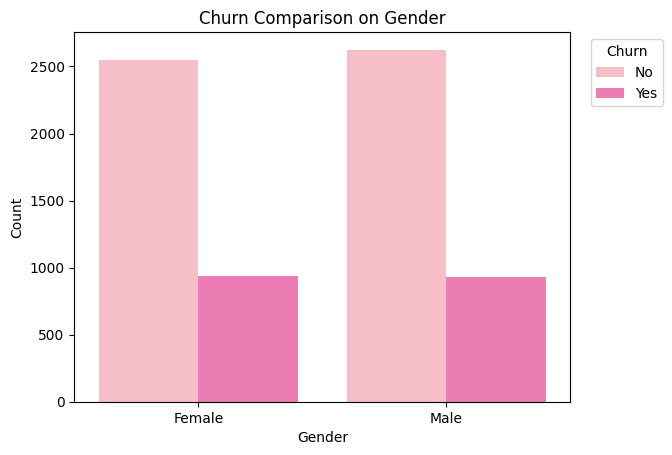

In [119]:
custom_pink_palette = ["#FFB6C1", "#FF69B4"]
sns.countplot(x="gender", hue="Churn", data=customer_df, palette=custom_pink_palette)
plt.title("Churn Comparison on Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Churn", loc="upper right", bbox_to_anchor=(1.2, 1))

plt.show()

The above shows that males are less likely to churn that females

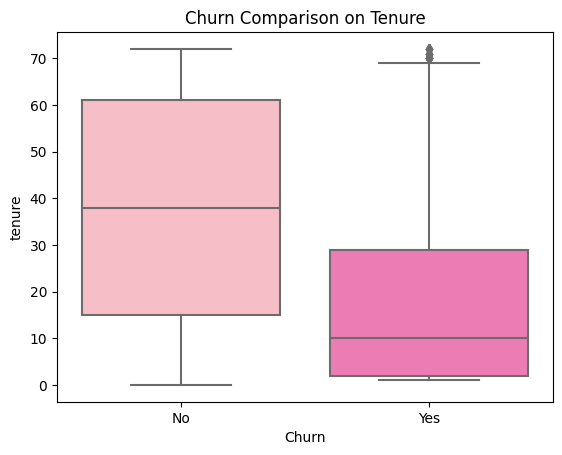

In [120]:
custom_pink_palette = ["#FFB6C1", "#FF69B4"]
sns.boxplot(x="Churn", y="tenure", data=customer_df, palette=custom_pink_palette)
plt.title("Churn Comparison on Tenure")



plt.show()

The above shows that those with a longer tenure are less likely to churn

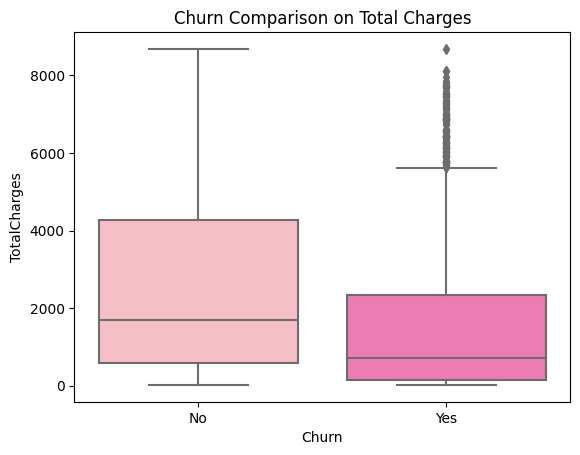

In [121]:
custom_pink_palette = ["#FFB6C1", "#FF69B4"]
sns.boxplot(x="Churn", y="TotalCharges", data=customer_df, palette=custom_pink_palette)
plt.title("Churn Comparison on Total Charges")





plt.show()

The above shows that those with a lower total charge are more likely to churn

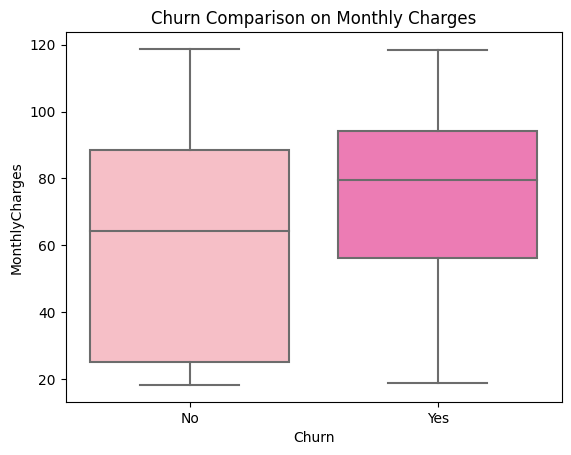

In [122]:
custom_pink_palette = ["#FFB6C1", "#FF69B4"]
sns.boxplot(x="Churn", y="MonthlyCharges", data=customer_df, palette=custom_pink_palette)
plt.title("Churn Comparison on Monthly Charges")



plt.show()

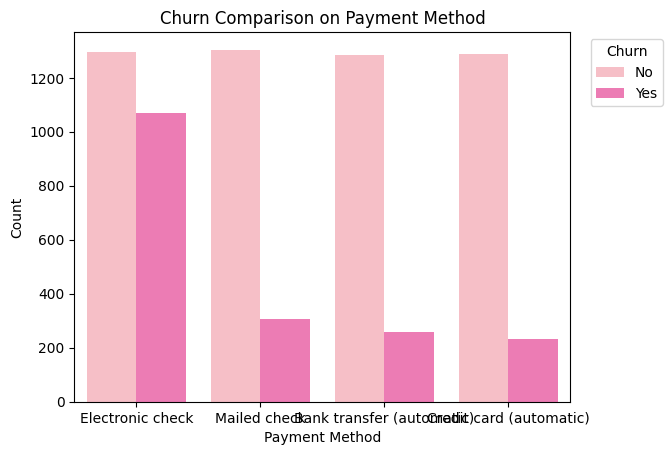

In [123]:
custom_pink_palette = ["#FFB6C1", "#FF69B4"]
sns.countplot(x="PaymentMethod", hue="Churn", data=customer_df, palette=custom_pink_palette)
plt.title("Churn Comparison on Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.legend(title="Churn", loc="upper right", bbox_to_anchor=(1.2, 1))

plt.show()

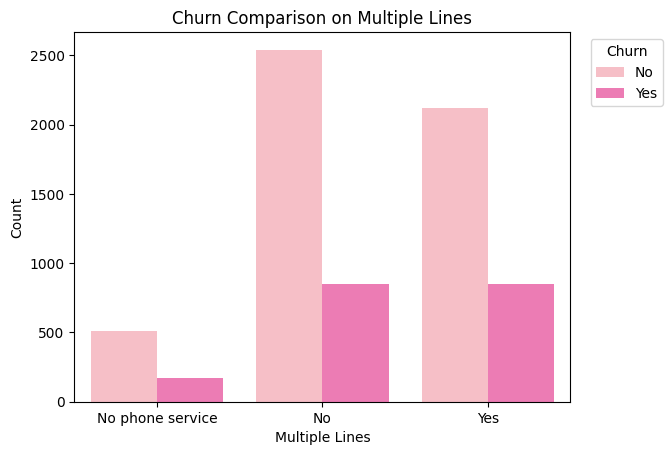

In [124]:
custom_pink_palette = ["#FFB6C1", "#FF69B4"]
sns.countplot(x="MultipleLines", hue="Churn", data=customer_df, palette=custom_pink_palette)
plt.title("Churn Comparison on Multiple Lines")
plt.xlabel("Multiple Lines")
plt.ylabel("Count")
plt.legend(title="Churn", loc="upper right", bbox_to_anchor=(1.2, 1))

plt.show()

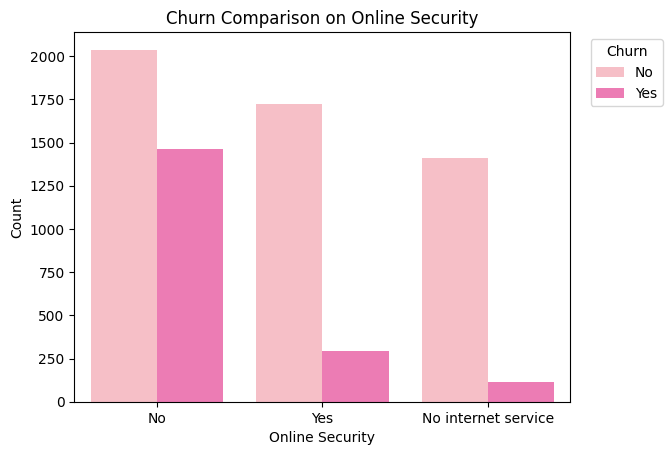

In [125]:
custom_pink_palette = ["#FFB6C1", "#FF69B4"]
sns.countplot(x="OnlineSecurity", hue="Churn", data=customer_df, palette=custom_pink_palette)
plt.title("Churn Comparison on Online Security")
plt.xlabel("Online Security")
plt.ylabel("Count")
plt.legend(title="Churn", loc="upper right", bbox_to_anchor=(1.2, 1))

plt.show()

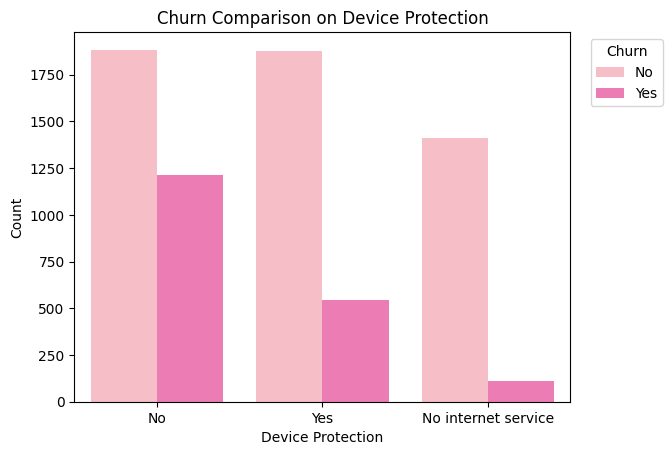

In [126]:
custom_pink_palette = ["#FFB6C1", "#FF69B4"]
sns.countplot(x="DeviceProtection", hue="Churn", data=customer_df, palette=custom_pink_palette)
plt.title("Churn Comparison on Device Protection")
plt.xlabel("Device Protection")
plt.ylabel("Count")
plt.legend(title="Churn", loc="upper right", bbox_to_anchor=(1.2, 1))

plt.show()

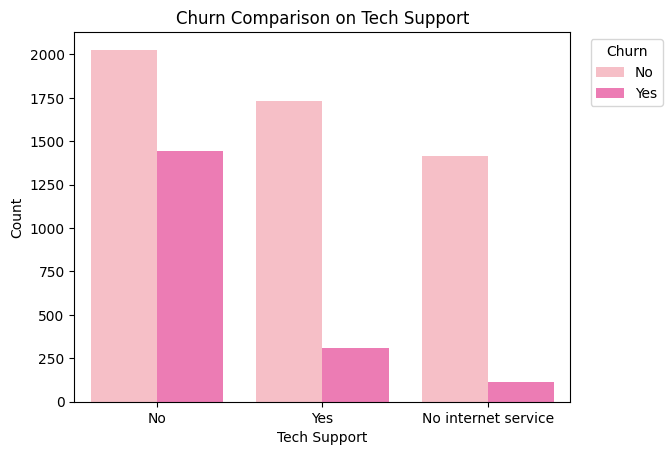

In [127]:
custom_pink_palette = ["#FFB6C1", "#FF69B4"]
sns.countplot(x="TechSupport", hue="Churn", data=customer_df, palette=custom_pink_palette)
plt.title("Churn Comparison on Tech Support")
plt.xlabel("Tech Support")
plt.ylabel("Count")
plt.legend(title="Churn", loc="upper right", bbox_to_anchor=(1.2, 1))

plt.show()

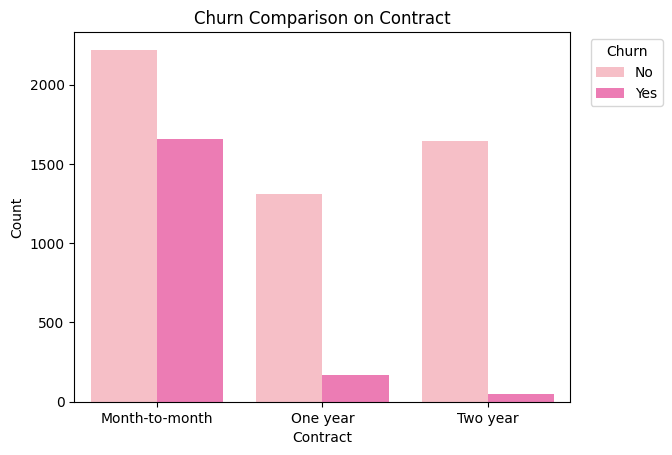

In [128]:
custom_pink_palette = ["#FFB6C1", "#FF69B4"]
sns.countplot(x="Contract", hue="Churn", data=customer_df, palette=custom_pink_palette)
plt.title("Churn Comparison on Contract")
plt.xlabel("Contract")
plt.ylabel("Count")
plt.legend(title="Churn", loc="upper right", bbox_to_anchor=(1.2, 1))

plt.show()

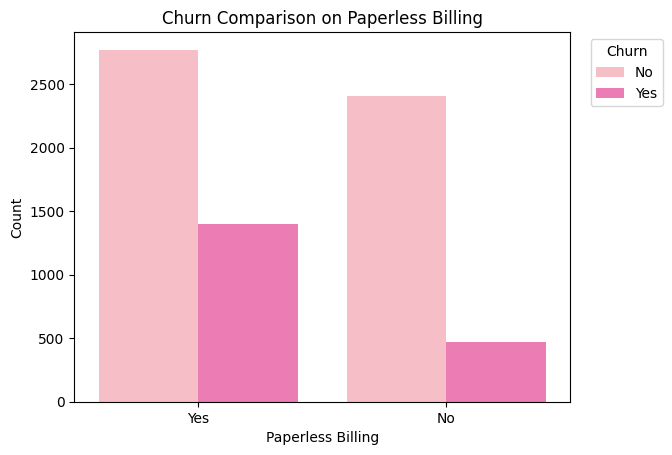

In [129]:
custom_pink_palette = ["#FFB6C1", "#FF69B4"]
sns.countplot(x="PaperlessBilling", hue="Churn", data=customer_df, palette=custom_pink_palette)
plt.title("Churn Comparison on Paperless Billing")
plt.xlabel("Paperless Billing")
plt.ylabel("Count")
plt.legend(title="Churn", loc="upper right", bbox_to_anchor=(1.2, 1))

plt.show()

***Training***

***Multi-Layer Perceptron model using the Functional API***

In [130]:
import keras
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam
from keras.utils import to_categorical


# from keras.optimizers import Adam


In [131]:
from sklearn.model_selection import train_test_split
X = customer_df_scaled.copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [132]:
X_train.shape[1]

11

In [133]:
# Keras Functional API model
input_layer = Input(shape=(X_train.shape[1],))
hidden_layer_1 = Dense(32, activation='relu')(input_layer)
hidden_layer_2 = Dense(24, activation='relu')(hidden_layer_1)
hidden_layer_3 = Dense(12, activation='relu')(hidden_layer_2)
output_layer = Dense(1, activation='sigmoid')(hidden_layer_3)

model = Model(inputs=input_layer, outputs=output_layer)

In [134]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/1000
177/177 [==============================] - 2s 5ms/step - loss: 0.6151 - accuracy: 0.6991 - val_loss: 0.5677 - val_accuracy: 0.7331
Epoch 2/1000
177/177 [==============================] - 1s 4ms/step - loss: 0.5415 - accuracy: 0.7330 - val_loss: 0.5104 - val_accuracy: 0.7402
Epoch 3/1000
177/177 [==============================] - 1s 3ms/step - loss: 0.4993 - accuracy: 0.7472 - val_loss: 0.4754 - val_accuracy: 0.7743
Epoch 4/1000
177/177 [==============================] - 1s 3ms/step - loss: 0.4728 - accuracy: 0.7742 - val_loss: 0.4531 - val_accuracy: 0.7857
Epoch 5/1000
177/177 [==============================] - 1s 3ms/step - loss: 0.4567 - accuracy: 0.7817 - val_loss: 0.4403 - val_accuracy: 0.7892
Epoch 6/1000
177/177 [==============================] - 1s 4ms/step - loss: 0.4473 - accuracy: 0.7843 - val_loss: 0.4330 - val_accuracy: 0.7906
Epoch 7/1000
177/177 [==============================] - 1s 5ms/step - loss: 0.4418 - accuracy: 0.7854 - val_loss: 0.4284 - val_accuracy:

In [135]:
_, accuracy = model.evaluate(X_train, y_train)

accuracy*100

177/177 [==============================] - 0s 2ms/step - loss: 0.3385 - accuracy: 0.8378


83.77707004547119

In [81]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 3.8 MB/s eta 0:00:00


In [82]:
import keras_tuner
from tensorflow import keras

In [83]:
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.InputLayer(input_shape=(X_train.shape[1],)))

    # Tune the number of hidden layers and units
    for i in range(hp.Int('num_hidden_layers', min_value=1, max_value=4)):
        model.add(keras.layers.Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=96, step=32),
                             activation=hp.Choice(f'activation_{i}', values=['relu', 'tanh'])))

    model.add(keras.layers.Dense(1, activation='sigmoid'))

    # Tune the learning rate
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy']
        )

    return model

In [84]:
build_model(keras_tuner.HyperParameters())

In [141]:
tuner = keras_tuner.Hyperband(
  hypermodel=build_model,
  objective='val_accuracy',
  max_epochs=100,
  factor=3,
  directory='tuning_dir',
  project_name='samples')

Reloading Tuner from tuning_dir/samples/tuner0.json


In [144]:
tuner.search(X_train, y_train, epochs=30 ,validation_data=(X_test, y_test))


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/base_tuner.py", line 273, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/base_tuner.py", line 238, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/tuners/hyperband.py", line 427, in run_trial
    return super().run_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/tuner.py", line 232, in _build_and_fit_model
    model = self._try_build(hp)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/tuner.py", line 164, in _t

RuntimeError: ignored

In [145]:
tuner.search_space_summary()

Search space summary
Default search space size: 10
num_hidden_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 4, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 96, 'step': 32, 'sampling': 'linear'}
activation_0 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 96, 'step': 32, 'sampling': 'linear'}
activation_1 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 96, 'step': 32, 'sampling': 'linear'}
activation_2 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
units_3 (Int)
{'default': None

In [146]:
tuner.results_summary()

Results summary
Results in tuning_dir/samples
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0004 summary
Hyperparameters:
num_hidden_layers: 1
units_0: 96
activation_0: tanh
lr: 0.009395397771248535
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 4
tuner/round: 0
Score: 1.0

Trial 0005 summary
Hyperparameters:
num_hidden_layers: 3
units_0: 96
activation_0: relu
lr: 0.0010503211938757365
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 4
tuner/round: 0
units_1: 32
activation_1: relu
units_2: 32
activation_2: relu
Score: 1.0

Trial 0003 summary
Hyperparameters:
num_hidden_layers: 1
units_0: 32
activation_0: relu
lr: 0.0009876339336677207
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 4
tuner/round: 0
Score: 0.9950319528579712

Trial 0006 summary
Hyperparameters:
num_hidden_layers: 2
units_0: 96
activation_0: relu
lr: 0.00014079295100691302
units_1: 96
activation_1: relu
units_2: 64
activation_2: tanh
tuner/epochs: 2
tuner/initial_epoch: 0

In [147]:
test_accuracy = model.evaluate(X_test, y_test)[1]
print(f"Test Accuracy: {test_accuracy:.4f}")

45/45 [==============================] - 0s 3ms/step - loss: 0.4574 - accuracy: 0.7864
Test Accuracy: 0.7864


In [148]:
model.save('assignment3_save_new.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


***Deploying***

In [137]:
import pickle
with open ("standard_scaler_new.pkl", "wb") as scaler_file:
  pickle.dump(Scaler, scaler_file)

In [138]:
import pickle
with open ('label_encoder_new.pkl', "wb") as label_encoder_file:
  pickle.dump(le, label_encoder_file)